<a href="https://colab.research.google.com/github/zayasinha/Mental_Health/blob/main/Mental_Health_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn nltk textblob tweepy sqlalchemy \
scikit-learn transformers streamlit
!python -m nltk.downloader('punkt')
!python -m nltk.downloader('stopwords')



/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python -m nltk.downloader('punkt')'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python -m nltk.downloader('stopwords')'


In [ ]:
!pip install tweepy pandas nltk textblob matplotlib seaborn wordcloud
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Suicide_Detection.csv')
print(f"Loaded {len(df)} posts")

Loaded 232074 posts


In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special chars and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # str() handles NaN
    # Tokenize and stem
    words = word_tokenize(text.lower())
    return ' '.join([ps.stem(w) for w in words if w not in stop_words])

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
  vs = analyzer.polarity_scores(text)
  return 'POSITIVE' if vs['compound'] > 0.05 else 'NEGATIVE' if vs['compound'] < -0.05 else 'NEUTRAL'

  df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [ ]:
risk_keywords = {
    'high': ['suicide', 'Kill myself', 'end it all'],
    'medium': ['depression', 'cutting', 'hopeless'],
    'low': ['sad', 'lonely', 'anxious']
}

def assess_risk(text):
  text = text.lower()
  for level, keywords in risk_keywords.items():
    if any(kw in text for kw in keywords):
      return level
  return 'none'
df['risk_level'] = df['text'].apply(assess_risk)


In [ ]:
!pip install --upgrade dash jupyter-dash plotly pyngrok
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from pyngrok import ngrok # Import pyngrok here

# Initialize the app
app = JupyterDash(__name__)

# App layout
app.layout = html.Div([
    dcc.Graph(id='risk-pie'),
    dcc.Dropdown(
        id='sentiment-filter',
        options=[{'label': s, 'value': s} for s in ['ALL', 'POSITIVE', 'NEGATIVE']],
        value='ALL'
    )
])

# Callback function
@app.callback(
    Output('risk-pie', 'figure'),
    Input('sentiment-filter', 'value')
)
def update_chart(sentiment):
    filtered = df if sentiment == 'ALL' else df[df['sentiment'] == sentiment]
    fig = px.pie(filtered, names='risk_level', title='Risk Level Distribution')
    return fig

# Run the app with ngrok tunnel
# Run the app with ngrok tunnel
# Set your ngrok authtoken here. Replace "YOUR_AUTHTOKEN" with your actual authtoken.
# You can find your authtoken on the ngrok dashboard: https://dashboard.ngrok.com/get-started/your-authtoken
    public_url = ngrok.connect(port='8050')
    print("Dashboard URL:", public_url)
    app.run_server(mode='inline', port=8050)


In [ ]:
import sqlite3

conn = sqlite3.connect('mental_health.db')
df.to_sql('posts', conn, if_exists='replace', index=False)

conn.execute("CREATE INDEX IF NOT EXISTS idx_risk ON posts(risk_level)")
conn.commit()

In [ ]:
import time
for _, row in df .sample(10).iterrows():
  print(f"New post: {row['text'][:50]}...")
  time.sleep(5)

New post: Apparently it’s a really common thing to be afraid...
New post: I went to REDDIT to be unbored Only to leave REDDI...
New post: It's my birthday in 2 days and I have decided to k...
New post: If the person you cared for the most made you suic...
New post: Winding down my last few weeks...I placed an order...
New post: Day 8 &amp; 9 of nothing Sorry i didnt do this shi...
New post: Does anyone else get bleeding knuckles in the wint...
New post: I want to die so fucking badNothing is worth this ...
New post: You all are dumbassesStupid people, you don't know...
New post: I'm numbwell this last month has been crazy. with ...


In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="mental_health_app")

In [ ]:
!pip install gspread
import gspread

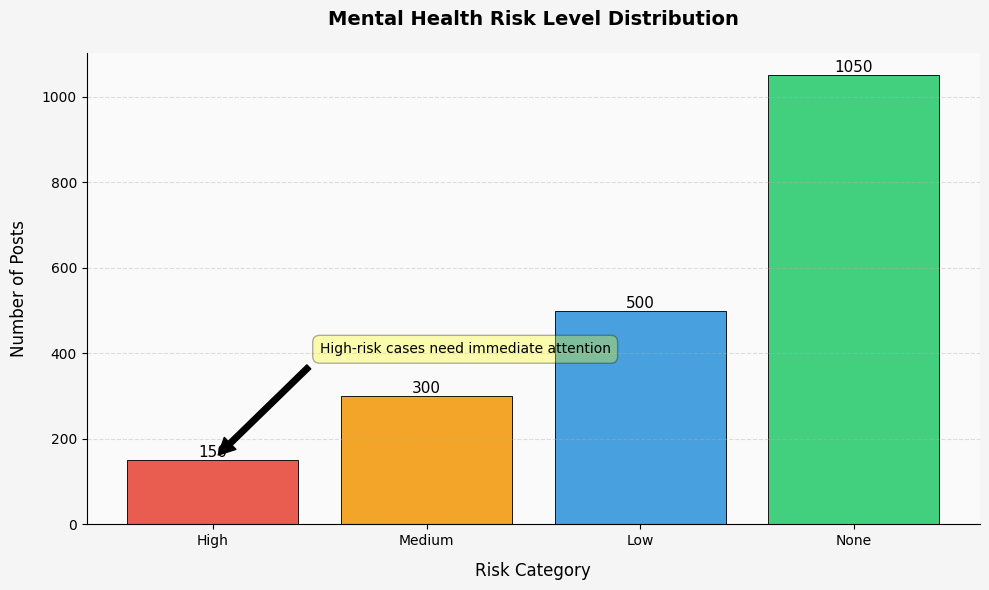

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual DataFrame)
data = {
    'Risk Level': ['High', 'Medium', 'Low', 'None'],
    'Count': [150, 300, 500, 1050]
}
df = pd.DataFrame(data)

# Create figure with professional styling
plt.figure(figsize=(10, 6), facecolor='#f5f5f5')
ax = plt.axes()
ax.set_facecolor('#fafafa')

# Custom color palette (colorblind-friendly)
colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']

# Plot with enhanced formatting
bars = plt.bar(df['Risk Level'], df['Count'], color=colors,
               edgecolor='black', linewidth=0.7, alpha=0.9)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11)

# Customize titles and labels
plt.title('Mental Health Risk Level Distribution',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Risk Category', labelpad=10, fontsize=12)
plt.ylabel('Number of Posts', labelpad=10, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top/right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add annotation
plt.annotate('High-risk cases need immediate attention',
             xy=(0, 150), xytext=(0.5, 400),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

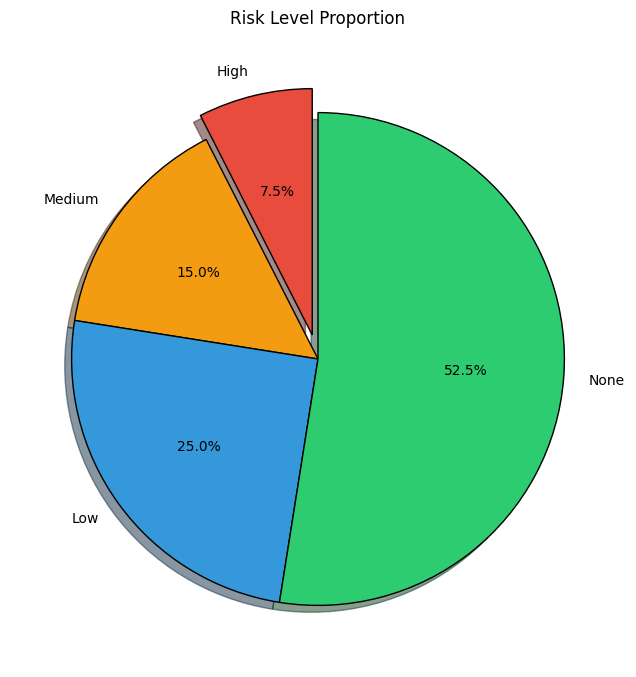

In [ ]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)  # Highlight high-risk
plt.pie(df['Count'], labels=df['Risk Level'],
        autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode,
        shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Risk Level Proportion', pad=20)
plt.show()